<a href="https://colab.research.google.com/github/isahaasasu/MAT422/blob/main/HW1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Homework 1.3**

### QR Decomposition

In [6]:
import numpy as np
a = np.array([[12,-51,4],[6,167,-68],[-4,24,-41]])
print("Vector a:\n", a, "\n")
v1 = np.array([12,6,-4])
v2 = np.array([-51,167,24])
v3 = np.array([4,-68,-41])
print("v1, v2, and v3:\n", v1, v2, v3, "\n")

print("Normalize v1: u1 = v1/length of v1")
lengthv1 = np.linalg.norm(v1)
u1 = v1/np.linalg.norm(v1)
print("u1 = ", u1, "\n")

print("Make v2 orthogonal to u1: u2 = v2 - Proj(v1)v2")
proj_of_v2_on_v1 = (np.dot(v2, v1)/lengthv1**2)*v1
U2 = v2 - proj_of_v2_on_v1
print("u2 = ", U2, "\n")

print("Normalize u2:")
lengthU2 = np.linalg.norm(U2)
u2 = U2/np.linalg.norm(U2)
print("u2 = ", u2)

print("Make v3 orthogonal to u1 and u2: u3 = v3 - ((v3dotu1)u1 + ((v3dotu2)u2)")
a = (np.dot(v3, u1))
b = (np.dot(v3, u2))
U3 = v3 - ((np.multiply(a,u1)) + (np.multiply(b,u2)) )
print("u3 = ", U3, "\n")

print("Normalize u3:")
lengthU3 = np.linalg.norm(U3)
u3 = U3/np.linalg.norm(U3)
print("u3 = ", u3, "\n")

print("Vector Q = [u1, u2, u3]")
Q = np.array(([6/7,-69/175,-58/175],[3/7,158/175,6/175],[-2/7,6/35,-33/35]))
print(Q) # Q is an orthogonal matrix

Vector a:
 [[ 12 -51   4]
 [  6 167 -68]
 [ -4  24 -41]] 

v1, v2, and v3:
 [12  6 -4] [-51 167  24] [  4 -68 -41] 

Normalize v1: u1 = v1/length of v1
u1 =  [ 0.85714286  0.42857143 -0.28571429] 

Make v2 orthogonal to u1: u2 = v2 - Proj(v1)v2
u2 =  [-69. 158.  30.] 

Normalize u2:
u2 =  [-0.39428571  0.90285714  0.17142857]
Make v3 orthogonal to u1 and u2: u3 = v3 - ((v3dotu1)u1 + ((v3dotu2)u2)
u3 =  [-11.6   1.2 -33. ] 

Normalize u3:
u3 =  [-0.33142857  0.03428571 -0.94285714] 

Vector Q = [u1, u2, u3]
[[ 0.85714286 -0.39428571 -0.33142857]
 [ 0.42857143  0.90285714  0.03428571]
 [-0.28571429  0.17142857 -0.94285714]]


Matrix Q is an orthogonal matrix. Each vector forms a right angle.


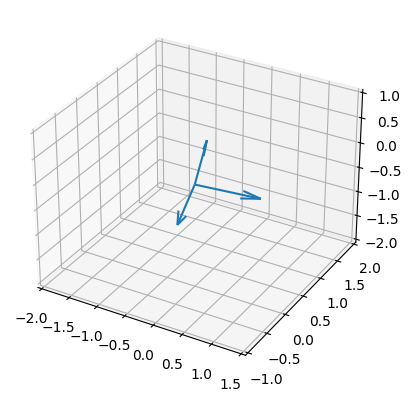

In [4]:
import matplotlib.pyplot as plt

print("Matrix Q is an orthogonal matrix. Each vector forms a right angle.")
m = [6/7, 3/7, -2/7]
n = [-69/175, 158/175, 6/35]
l = [-58/175, 6/175, -33/35]
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlim([-2,1.5])
ax.set_ylim([-1,2])
ax.set_zlim([-2,1])
start = [0,0,0]
ax.quiver(start[0], start[1], start[2], m[0], m[1], m[2])
ax.quiver(start[0], start[1], start[2], n[0], n[1], n[2])
ax.quiver(start[0], start[1], start[2], l[0], l[1], l[2])
plt.show()

### Linear Regressions from Stratch

In [8]:
import pandas as pd
import numpy as np

np.random.seed(0) # Generate 'random' data
A = 2 * np.random.randn(100)
res = np.random.randn(100)
b = 4 + 3 * A + res

# Create pandas dataframe to store A and b values
df = pd.DataFrame(
    {'A': A,
     'b': b})

# Show the first five rows of the dataframe
df.head()

,A,b
0,3.528105,16.467465
1,0.800314,5.053184
2,1.957476,8.601943
3,4.481786,18.414756
4,3.735116,14.032225


In [9]:
# Calculate the mean of A and b
Amean = np.mean(A)
bmean = np.mean(b)

# Calculate the terms needed for the numator and denominator of beta
df['Abcov'] = (df['A'] - Amean) * (df['b'] - bmean)
df['Avar'] = (df['A'] - Amean)**2

# Calculate beta and alpha
beta = df['Abcov'].sum() / df['Avar'].sum()
alpha = bmean - (beta * Amean)
print(f'alpha = {alpha}')
print(f'beta = {beta}')

alpha = 4.075153085052514
beta = 3.057349216773192


In [10]:
ypred = alpha + beta * A # Get a prediction

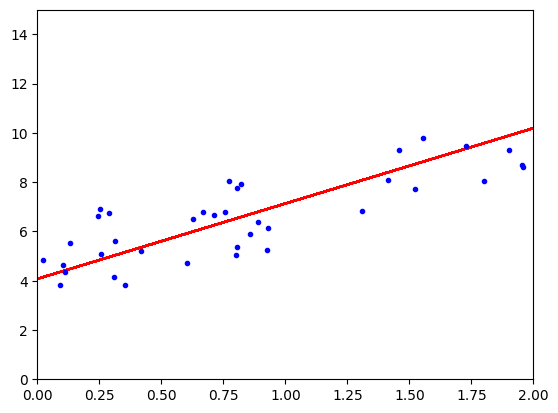

In [11]:
# Plot data and fitted line
import matplotlib.pyplot as plt

plt.plot(A, ypred, "r--")
plt.plot(A, b, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

###Linear Regression using example from sklearn:

Automatically created module for IPython interactive environment
Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


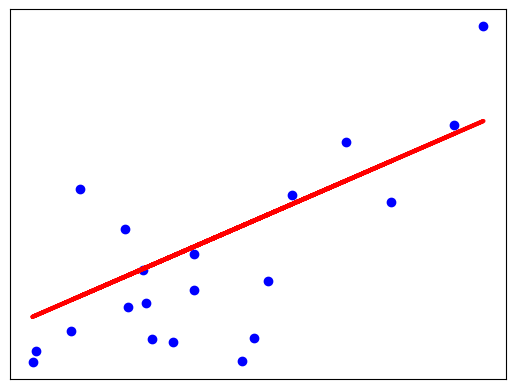

In [12]:
print(__doc__)


# Code source: Jaques Grobler
# link: https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
# License: BSD 3 clause


import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='blue')
plt.plot(diabetes_X_test, diabetes_y_pred, color='red', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()